In [33]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

In [34]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [35]:
X[:5],y[:5]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6]]),
 array([0, 0, 0, 0, 0]))

In [36]:
def plot_svm_decision_boundaries(models, titles, X, y, feature_names, figsize=(12, 6)):
    """
    Plots decision boundaries for a list of SVM models.

    Parameters:
    - models: List of trained SVM models
    - titles: List of titles for each subplot
    - X: Feature data
    - y: Target labels
    - feature_names: List of feature names for axis labels
    - figsize: Size of the figure
    """
    num_models = len(models)
    
    # Set up the plot
    fig, sub = plt.subplots(1, num_models, figsize=figsize)
    
    # Ensure sub is iterable even if there's only one subplot
    if num_models == 1:
        sub = [sub]
    
    plt.subplots_adjust(wspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]

    # Plot decision boundaries for each model
    for clf, title, ax in zip(models, titles, sub):
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel=feature_names[0],
            ylabel=feature_names[1],
        )
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()



In [37]:
C = 1.0 # SVM regularization parameter

clf_svc = svm.SVC(kernel="linear", C=C)
clf_svc.fit(X, y)

clf_linear_svc = svm.LinearSVC(C=C, max_iter=10000)
clf_linear_svc.fit(X, y)

clf_rbf = svm.SVC(kernel="rbf", gamma=0.7, C=C)
clf_rbf.fit(X, y)

clf_poly= svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
clf_poly.fit(X, y)


/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC(gamma='auto', kernel='poly')

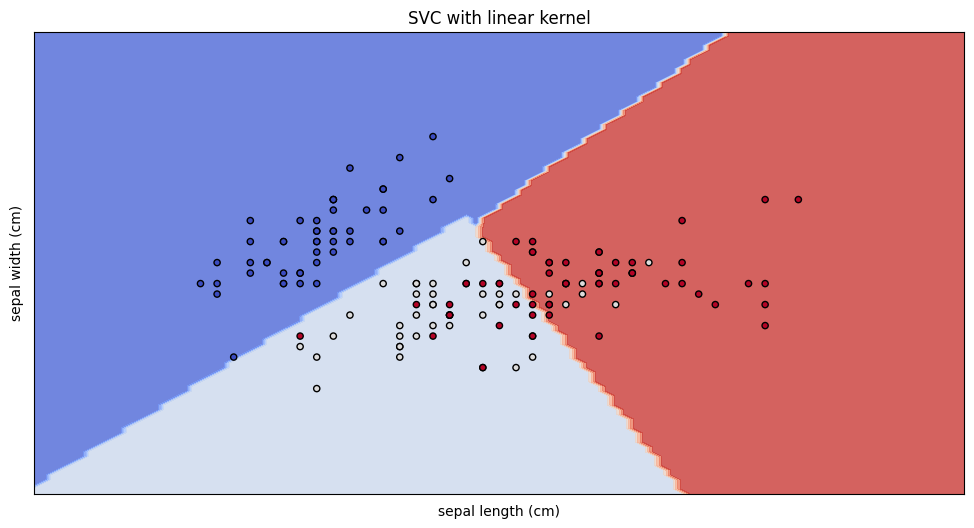

In [38]:
models = [clf_svc]
titles = ["SVC with linear kernel"]

plot_svm_decision_boundaries(models, titles, X, y, iris.feature_names)

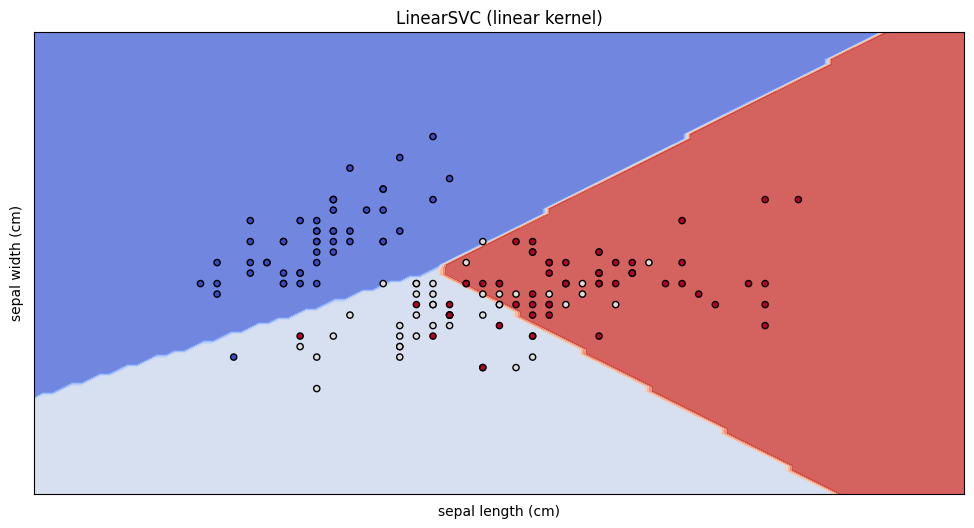

In [24]:
models = [clf_linear_svc]
titles = ["LinearSVC (linear kernel)"]

plot_svm_decision_boundaries(models, titles, X, y, iris.feature_names)

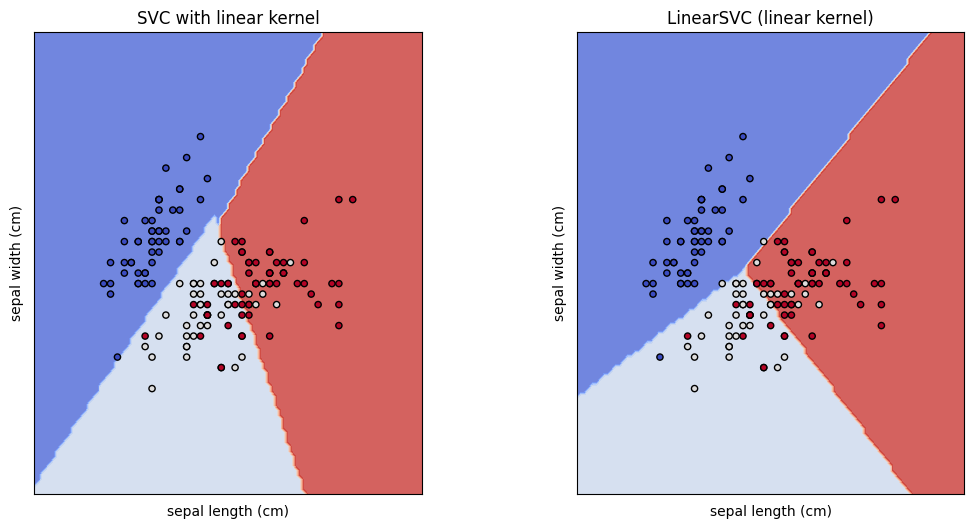

In [26]:
# Define models and titles
models = [clf_svc, clf_linear_svc]
titles = ["SVC with linear kernel", "LinearSVC (linear kernel)"]

# Plot decision boundaries
plot_svm_decision_boundaries(models, titles, X, y, iris.feature_names)

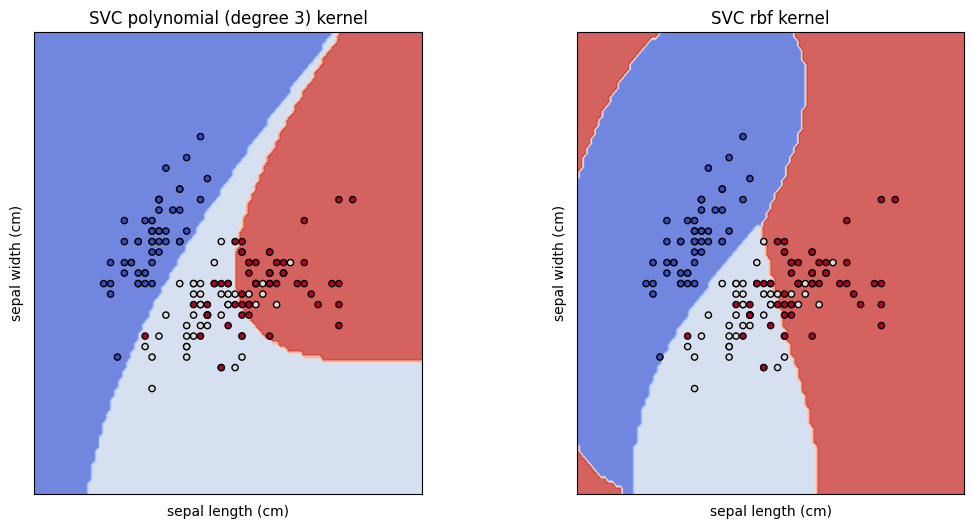

In [40]:
models = [clf_poly,clf_rbf]
titles = ["SVC polynomial (degree 3) kernel","SVC rbf kernel"]

# Plot decision boundaries
plot_svm_decision_boundaries(models, titles, X, y, iris.feature_names)